<a href="https://colab.research.google.com/github/LucianoMO101/pytorch-convolutional-neural-network/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uitleg over Tensor en Numpy


##Tensor match

In [1]:
import torch

my_torch = torch.arange(10)
my_torch

# Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch

# Reshape if we don't know the number of items using -1
my_torch2 = torch.arange(10)
my_torch2

my_torch2 = my_torch2.reshape(-1, 5)
my_torch2

my_torch3 = torch.arange(10)
my_torch3

my_torch4 = my_torch3.view(2,5)
my_torch4

# with reshape and view, they will update
my_torch5 = torch.arange(10)
my_torch5

my_torch6 = my_torch5.reshape(2,5)
my_torch6

my_torch5[1] = 4141
my_torch5

my_torch6

# Slices
my_torch7 = torch.arange(10)
my_torch7

# Grab a specific item
my_torch7[7]

# Grab slice
my_torch8 = my_torch7.reshape(5,2)
my_torch8

my_torch8[:,1]

# Return column
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [2]:
# Grab a specific item
my_torch7[7]

tensor(7)

In [3]:
# Grab slice
my_torch8 = my_torch7.reshape(5,2)
my_torch8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [4]:
my_torch8[:,1]

tensor([1, 3, 5, 7, 9])

In [5]:
# Return column
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

##Tensor Match

In [6]:
import torch
import numpy as np


In [7]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [8]:
# Addition
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [9]:
# Addition in longhand
torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

In [10]:
# Substraction
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [11]:
# Sub function
torch.sub(tensor_b, tensor_a)

tensor([4, 4, 4, 4])

In [12]:
# Multiplication
tensor_a * tensor_b

#Is hetzelfde als dit
torch.mul(tensor_a, tensor_b)

tensor([ 5, 12, 21, 32])

In [13]:
# Division (eindigt als float met decimals)
tensor_b / tensor_a

# Is hetzelfde als dit
torch.div(tensor_b, tensor_a)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [14]:
# Remainder Modules
tensor_b % tensor_a

#Zo kan het ook
torch.remainder(tensor_b, tensor_a)

tensor([0, 0, 1, 0])

In [15]:
# Exponents / power
tensor_a ** tensor_b

#Zo kan het ook
torch.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [16]:
#tensor_a = tensor_a + tensor_b

#Maar het kan ook zo
tensor_a.add_(tensor_b)
tensor_a

tensor([ 6,  8, 10, 12])

##List and Numpy Arrays

In [17]:
my_list_one_dimension = [1,2,3,4,5]
my_list_multi_dimensional = [[1,2,3,4,5], [6,7,8,9,10]]

my_list_one_dimension
my_list_multi_dimensional

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [18]:
np1 = np.random.rand(3,4)
np1

array([[0.8495773 , 0.54083239, 0.45991095, 0.35042681],
       [0.56505532, 0.31101499, 0.38829296, 0.0160211 ],
       [0.94448913, 0.27242358, 0.11050813, 0.8056652 ]])

In [19]:
np1.dtype

dtype('float64')

## Tensors


In [20]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[-0.7106,  0.2584,  1.9104, -1.4725],
        [ 0.3736,  0.3100, -1.6528, -1.1736],
        [ 1.1464, -1.6982,  0.8097, -0.5482]])

In [21]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [22]:
## Create tensor out of numpy array
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.8496, 0.5408, 0.4599, 0.3504],
        [0.5651, 0.3110, 0.3883, 0.0160],
        [0.9445, 0.2724, 0.1105, 0.8057]], dtype=torch.float64)

#Convolutional Neural Network


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

#Machine Learning stuff
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Convert MNIST Image Files into a Tensor of 4-Dimensions (Numbers of images, Heights, Width and Color Channel)
transform = transforms.ToTensor()

In [25]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.07MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.26MB/s]


In [26]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [27]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [28]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [29]:
# Create a small batch size for images... let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [30]:
# Define Our CNN Model
# Describe convolutional layer and what it's doing(2 convolutional layers)
# This is just an example
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [31]:
# Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [32]:
X_train.shape

torch.Size([1, 28, 28])

In [33]:
x = X_train.view(1,1,28,28)

In [34]:
# Perform our first convolution
#relu staat voor Rectified Linear Unit
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function

In [35]:
# 1 single image, 6 is the filters we asked for
#26x26 is the image
x.shape

torch.Size([1, 6, 26, 26])

In [36]:
# pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # kernal of 2 and stride of 2

In [37]:
x.shape #26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [38]:
 # Do our second convolutional layer
 x = F.relu(conv2(x))

In [39]:
x.shape # Again, we didn't set padding so we lose 2 pixels around the outside of the image

torch.Size([1, 16, 11, 11])

In [40]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [41]:
x.shape # 11 / 2 = 5.5 but we have to round down, because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [42]:
# Model CLass
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #Fully Connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal and stride 2

    # Re-View to flatten it out
    X = X.view(-1, 16*5*5) # negative one so that we can vary the batch size
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [43]:
# Create an Instance of our Model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # The smaller the Learning Rate, the longer its gonna take to train.

In [46]:
import time
start_time = time.time()

#Create Variables to Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened.
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train.

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct prediction. Indexed off the first point
    batch_correct = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False = 0, sum those up
    trn_corr += batch_correct # keep track as we go along in training.

    #Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Test
  with torch.no_grad(): # No gradient so we don't update our weights and biases with test data.
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.06289136409759521
Epoch: 0  Batch: 1200  Loss: 0.010614877566695213
Epoch: 0  Batch: 1800  Loss: 0.03243611007928848
Epoch: 0  Batch: 2400  Loss: 0.012448625639081001
Epoch: 0  Batch: 3000  Loss: 0.000640809943433851
Epoch: 0  Batch: 3600  Loss: 0.0020938280504196882
Epoch: 0  Batch: 4200  Loss: 0.3140248656272888
Epoch: 0  Batch: 4800  Loss: 0.020231451839208603
Epoch: 0  Batch: 5400  Loss: 0.0031914091669023037
Epoch: 0  Batch: 6000  Loss: 0.0009488927898928523
Epoch: 1  Batch: 600  Loss: 0.009655272588133812
Epoch: 1  Batch: 1200  Loss: 0.0012097712606191635
Epoch: 1  Batch: 1800  Loss: 0.10811348259449005
Epoch: 1  Batch: 2400  Loss: 0.01688917726278305
Epoch: 1  Batch: 3000  Loss: 0.025794899091124535
Epoch: 1  Batch: 3600  Loss: 0.00010044014925369993
Epoch: 1  Batch: 4200  Loss: 5.256626900518313e-05
Epoch: 1  Batch: 4800  Loss: 0.0002409588050795719
Epoch: 1  Batch: 5400  Loss: 0.007484280504286289
Epoch: 1  Batch: 6000  Loss: 0.0020166474860161543

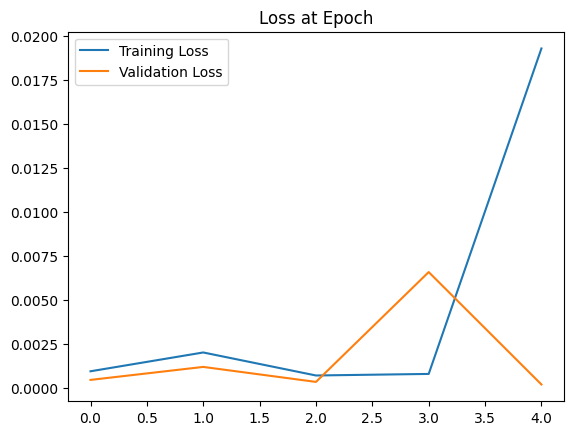

In [47]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

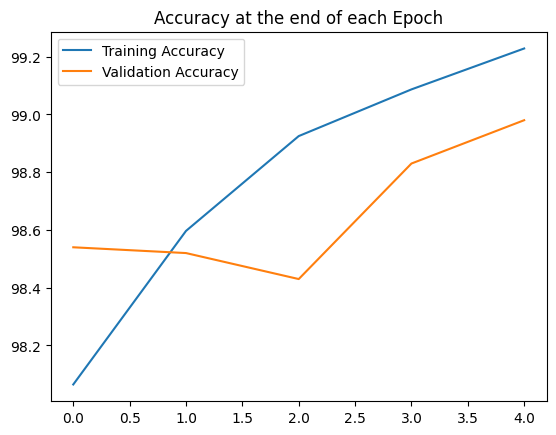

In [48]:
#graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [49]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [51]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [55]:
# Test for correct
correct.item()/len(test_data)*100

98.98

In [56]:
# Grab an image
test_data[4143] # Tensor with an image in it... at end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [57]:
# Grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [58]:
# Reshape it
test_data[4143][0].reshape(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

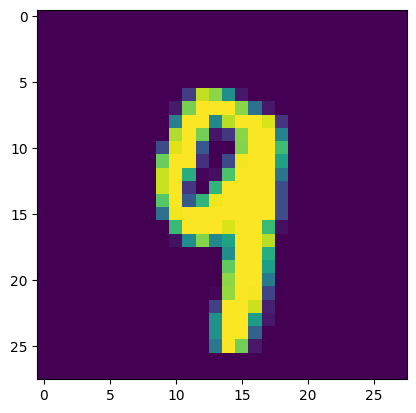

In [59]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [60]:
# Pass the image through our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 larger

In [62]:
# Check the new prediction... get probabilities
new_prediction

tensor([[-2.3243e+01, -1.9199e+01, -2.4948e+01, -1.7938e+01, -1.0005e+01,
         -1.6182e+01, -3.5191e+01, -1.2536e+01, -1.8104e+01, -4.8875e-05]])

In [63]:
new_prediction.argmax()

tensor(9)

#Convolution Neural Network Volledige code + Uitleg

Epoch: 0  Batch: 600  Loss: 0.1623610556125641
Epoch: 0  Batch: 1200  Loss: 0.1502392590045929
Epoch: 0  Batch: 1800  Loss: 0.4744560718536377
Epoch: 0  Batch: 2400  Loss: 0.14238706231117249
Epoch: 0  Batch: 3000  Loss: 0.007758188061416149
Epoch: 0  Batch: 3600  Loss: 0.3836284875869751
Epoch: 0  Batch: 4200  Loss: 0.0038223876617848873
Epoch: 0  Batch: 4800  Loss: 0.0021286322735249996
Epoch: 0  Batch: 5400  Loss: 0.0569545142352581
Epoch: 0  Batch: 6000  Loss: 0.00038789428072050214
Epoch: 1  Batch: 600  Loss: 0.005851339548826218
Epoch: 1  Batch: 1200  Loss: 0.3855525553226471
Epoch: 1  Batch: 1800  Loss: 0.004819948226213455
Epoch: 1  Batch: 2400  Loss: 0.003216963727027178
Epoch: 1  Batch: 3000  Loss: 0.0332382395863533
Epoch: 1  Batch: 3600  Loss: 0.5372857451438904
Epoch: 1  Batch: 4200  Loss: 0.04561494290828705
Epoch: 1  Batch: 4800  Loss: 0.0007510822033509612
Epoch: 1  Batch: 5400  Loss: 0.0001173773780465126
Epoch: 1  Batch: 6000  Loss: 0.14201366901397705
Epoch: 2  Batch

tensor(9)

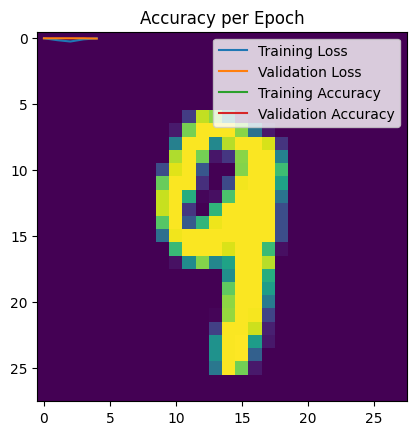

In [66]:
# ==========================================
# CONVOLUTIONAL NEURAL NETWORK (CNN) MET MNIST DATASET
# ==========================================
# In deze code bouwen we een CNN om handgeschreven cijfers (0–9) te herkennen
# met behulp van de MNIST dataset.
# Elke stap is voorzien van Nederlandstalige uitleg om inzicht te geven in wat er gebeurt.

# ------------------------------
# 1. Importeren van de nodige pakketten
# ------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# Extra pakketten voor analyse en visualisatie
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# Hiermee worden plots direct in de notebook getoond


# ------------------------------
# 2. Data Voorbereiding
# ------------------------------
# We gebruiken de MNIST dataset (handgeschreven cijfers)
# Elke afbeelding is 28x28 pixels en zwart-wit (1 kleurkanaal)
# transforms.ToTensor() zet afbeeldingen om naar tensoren (PyTorch’s datatype voor numerieke berekeningen)
transform = transforms.ToTensor()

# Download en laad de trainingsdata
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

# Download en laad de testdata
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

# Deze twee regels tonen informatie over de dataset (alleen om te testen)
train_data
test_data


# ------------------------------
# 3. DataLoader aanmaken
# ------------------------------
# De DataLoader verdeelt de dataset in kleine batches.
# batch_size bepaalt hoeveel afbeeldingen tegelijk aan het model worden gevoerd.
# shuffle=True zorgt dat de volgorde willekeurig wordt, wat training robuuster maakt.
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)


# ------------------------------
# 4. Eerste test met convolutionele lagen
# ------------------------------
# Een convolutionele laag scant de afbeelding met filters (ook wel kernels genoemd)
# en leert belangrijke kenmerken (randen, vormen, patronen).
conv1 = nn.Conv2d(1, 6, 3, 1)   # 1 input kanaal (zwart-wit), 6 filters, kernelgrootte 3x3, stride 1
conv2 = nn.Conv2d(6, 16, 3, 1)  # 6 inputkanalen, 16 filters, kernelgrootte 3x3, stride 1


# ------------------------------
# 5. Test één afbeelding door de lagen (om te begrijpen wat er gebeurt)
# ------------------------------
for i, (X_train, y_train) in enumerate(train_data):
  break  # Pak de eerste afbeelding uit de dataset

X_train.shape  # (1, 28, 28) → 1 kanaal, 28x28 pixels

# Reshape zodat PyTorch het als batch kan verwerken (batch_size, channels, height, width)
x = X_train.view(1, 1, 28, 28)

# Eerste convolutie + activatiefunctie (ReLU = maakt negatieve waarden 0)
x = F.relu(conv1(x))
x.shape  # Verwacht: torch.Size([1, 6, 26, 26])

# Poolinglaag reduceert resolutie → verkleint data maar behoudt belangrijke info
x = F.max_pool2d(x, 2, 2)
x.shape  # Verwacht: torch.Size([1, 6, 13, 13])

# Tweede convolutielaag
x = F.relu(conv2(x))
x.shape  # torch.Size([1, 16, 11, 11])

# Nog een poolinglaag
x = F.max_pool2d(x, 2, 2)
x.shape  # torch.Size([1, 16, 5, 5])


# ------------------------------
# 6. CNN Modelklasse definiëren
# ------------------------------
# We maken nu een klasse voor het volledige model.
# Deze klasse beschrijft hoe data door het netwerk stroomt.
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    # Convolutielagen
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    # Volledig verbonden lagen (Dense Layers)
    # Deze nemen de output van de convolutielagen en gebruiken die om classificatie te doen.
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)  # 10 klassen voor cijfers 0–9

  def forward(self, X):
    # Eerste convolutie + pooling
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)

    # Tweede convolutie + pooling
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    # Flatten (maakt tensor 2D zodat deze naar dense layers kan)
    X = X.view(-1, 16*5*5)

    # Volledig verbonden lagen + activaties
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    # Log-Softmax geeft waarschijnlijkheidsverdeling over 10 klassen
    return F.log_softmax(X, dim=1)


# ------------------------------
# 7. Model aanmaken
# ------------------------------
torch.manual_seed(41)  # Voor reproduceerbare resultaten
model = ConvolutionalNetwork()
model  # Laat modelstructuur zien


# ------------------------------
# 8. Lossfunctie en optimizer
# ------------------------------
# CrossEntropyLoss vergelijkt voorspelling vs. echte labels
# Adam is een optimizer die de gewichten aanpast tijdens training.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# ------------------------------
# 9. Model trainen
# ------------------------------
import time
start_time = time.time()

epochs = 5  # Aantal keer dat het model door de volledige dataset gaat
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # ----- TRAINING FASE -----
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1
    y_pred = model(X_train)          # Voorspelling maken
    loss = criterion(y_pred, y_train)  # Bereken verlies

    # Aantal correcte voorspellingen in deze batch
    predicted = torch.max(y_pred.data, 1)[1]
    batch_correct = (predicted == y_train).sum()
    trn_corr += batch_correct

    # Backpropagation (update gewichten)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print voortgang om training te monitoren
    if b % 600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  # Opslaan van statistieken voor latere grafieken
  train_losses.append(loss)
  train_correct.append(trn_corr)

  # ----- TEST FASE -----
  with torch.no_grad():  # Geen backpropagation tijdens testen
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  # Verlies en juistheid opslaan
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


# ------------------------------
# 10. Trainingstijd berekenen
# ------------------------------
current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')


# ------------------------------
# 11. Resultaten visualiseren
# ------------------------------
# We bekijken het verlies en de nauwkeurigheid per epoch
train_losses = [tl.item() for tl in train_losses]

# Plot verlies
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss per Epoch")
plt.legend()

# Plot nauwkeurigheid
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy per Epoch")
plt.legend()


# ------------------------------
# 12. Test: modelprestatie op gehele testset
# ------------------------------
# We evalueren hoe goed het model presteert op ALLE testafbeeldingen tegelijk.
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

# Percentage correcte voorspellingen
correct.item() / len(test_data) * 100


# ------------------------------
# 13. Individuele voorspelling testen
# ------------------------------
# In dit deel bekijken we één afbeelding en laten het model voorspellen welk cijfer het is.

# Ophalen van afbeelding #4143
test_data[4143]  # Tuple: (afbeelding, label)

# Alleen de afbeeldingsdata
test_data[4143][0]

# Reshape om visueel te maken
test_data[4143][0].reshape(28, 28)

# Toon afbeelding
plt.imshow(test_data[4143][0].reshape(28,28))

# Model in evaluatiemodus zetten
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28))  # batch=1

# Modeluitvoer (log-waarschijnlijkheden per cijfer)
new_prediction

# Hoogste waarschijnlijkheid = voorspelde klasse
new_prediction.argmax()
